In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
train = pd.read_csv('Google_Stock_Price_Train.csv')

In [13]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [14]:
training_set=train.iloc[:,1:2].values

In [15]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [16]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
training_set_scaled.shape

(1258, 1)

In [18]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
#reshape it to (batche_size(#size of inputs),timesteps,input_dimension)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
X_train.shape

(1198, 60, 1)

In [21]:
regressor=Sequential()

In [22]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.4))

In [23]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

In [24]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

In [25]:
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))

In [26]:
regressor.add(Dense(units=1))

In [27]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [28]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 18s 188ms/step - loss: 0.0530
Epoch 2/100
38/38 [==============================] - 7s 179ms/step - loss: 0.0089
Epoch 3/100
38/38 [==============================] - 7s 183ms/step - loss: 0.0074
Epoch 4/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0063
Epoch 5/100
38/38 [==============================] - 7s 181ms/step - loss: 0.0074
Epoch 6/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0060
Epoch 7/100
38/38 [==============================] - 7s 178ms/step - loss: 0.0066
Epoch 8/100
38/38 [==============================] - 7s 179ms/step - loss: 0.0054
Epoch 9/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0063
Epoch 10/100
38/38 [==============================] - 7s 183ms/step - loss: 0.0052
Epoch 11/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0054
Epoch 12/100
38/38 [==============================] - 6s 171ms/step - loss: 0.0054
Epoch 13/100

38/38 [==============================] - 7s 179ms/step - loss: 0.0021
Epoch 100/100
38/38 [==============================] - 7s 191ms/step - loss: 0.0021


In [29]:
test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test.iloc[:, 1:2].values
total_data=pd.concat([train['Open'],test['Open']],axis=0)

In [30]:
inputs=total_data[len(train)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [31]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [32]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


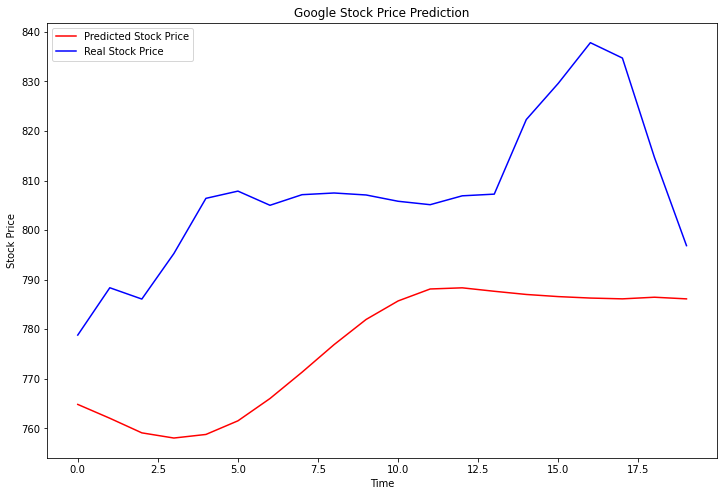

In [33]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
